In [1]:
import warnings

warnings.filterwarnings("ignore")

In [2]:
from prophet import Prophet
import pandas as pd

Importing plotly failed. Interactive plots will not work.


In [3]:
df = pd.read_csv('Monthly_CPI_data_w_percent_change.csv', index_col = 0)

In [4]:
food = df.reset_index()
food = food.loc[~df.index.str.contains("Percent Change"), ["Food", "index"]] #isolating food category
food["index"] = pd.to_datetime(food["index"]) #convert dates to datetime objects
food.rename(columns={"Food":"y", "index":"ds"}, inplace = True)  #rename columns to be compatible with the model
food

,y,ds
0,232.666,2012-01-01
1,232.486,2012-02-01
2,232.792,2012-03-01
3,233.234,2012-04-01
4,233.339,2012-05-01
...,...,...
133,279.135,2021-08-01
134,281.506,2021-09-01
135,284.205,2021-10-01
136,285.507,2021-11-01


In [55]:
m = Prophet()
model = m.fit(food)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [56]:
future = m.make_future_dataframe(periods = 2, freq = 'y')
food_model = m.predict(future)
food_model

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-01-01,232.340646,231.112587,233.610055,232.340646,232.340646,-0.005062,-0.005062,-0.005062,-0.005062,-0.005062,-0.005062,0.0,0.0,0.0,232.335584
1,2012-02-01,232.615770,231.299067,233.835583,232.615770,232.615770,0.009526,0.009526,0.009526,0.009526,0.009526,0.009526,0.0,0.0,0.0,232.625297
2,2012-03-01,232.873145,231.003009,233.666882,232.873145,232.873145,-0.546789,-0.546789,-0.546789,-0.546789,-0.546789,-0.546789,0.0,0.0,0.0,232.326356
3,2012-04-01,233.148270,232.132421,234.747119,233.148270,233.148270,0.316587,0.316587,0.316587,0.316587,0.316587,0.316587,0.0,0.0,0.0,233.464857
4,2012-05-01,233.414519,232.311534,234.806505,233.414519,233.414519,0.158624,0.158624,0.158624,0.158624,0.158624,0.158624,0.0,0.0,0.0,233.573144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,2021-10-01,281.493571,280.560544,283.141756,281.493571,281.493571,0.372117,0.372117,0.372117,0.372117,0.372117,0.372117,0.0,0.0,0.0,281.865688
118,2021-11-01,282.458208,280.990614,283.488730,282.458208,282.458208,-0.252866,-0.252866,-0.252866,-0.252866,-0.252866,-0.252866,0.0,0.0,0.0,282.205343
119,2021-12-01,283.391728,281.902279,284.449776,283.391728,283.391728,-0.155632,-0.155632,-0.155632,-0.155632,-0.155632,-0.155632,0.0,0.0,0.0,283.236096
120,2021-12-31,284.325248,283.212924,285.644754,284.324983,284.325248,0.090592,0.090592,0.090592,0.090592,0.090592,0.090592,0.0,0.0,0.0,284.415841


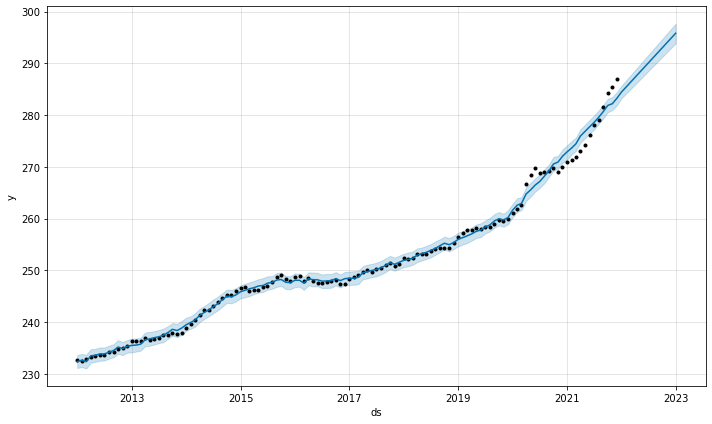

In [57]:
food_modelplot = m.plot(food_model)

__This was actually very interesting! The model did a great job at finding the trend and was not fazed by the fact that it wasn't stationary. I will later try a category that has more erratic changes to see how the model works with that__

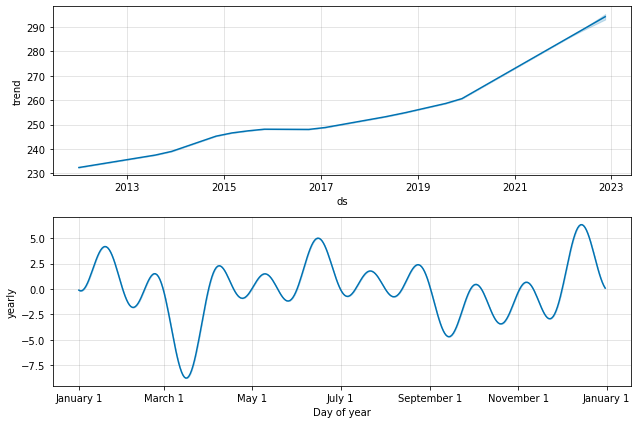

In [8]:
food_trendplots = m.plot_components(food_model)

__These show the trends of the data. The second plot shows the yearly seasonality. So it seems like the CPI of food is lower in April? Not sure what that's about, but I'm planning to look into it! Okay, now onto energy!__

In [9]:
energy = df.reset_index()
energy = energy.loc[~df.index.str.contains("Percent Change"), ["Energy", "index"]] #isolating energy category
energy["index"] = pd.to_datetime(energy["index"]) #convert dates to datetime objects
energy.rename(columns={"Energy":"y", "index":"ds"}, inplace = True)  #rename columns to be compatible with the model
energy

,y,ds
0,236.942,2012-01-01
1,242.663,2012-02-01
2,253.599,2012-03-01
3,255.736,2012-04-01
4,250.306,2012-05-01
...,...,...
133,246.639,2021-08-01
134,248.228,2021-09-01
135,255.338,2021-10-01
136,259.100,2021-11-01


In [52]:
m = Prophet()
model = m.fit(energy)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [53]:
future = m.make_future_dataframe(periods = 2, freq = 'y')
energy_model = m.predict(future)

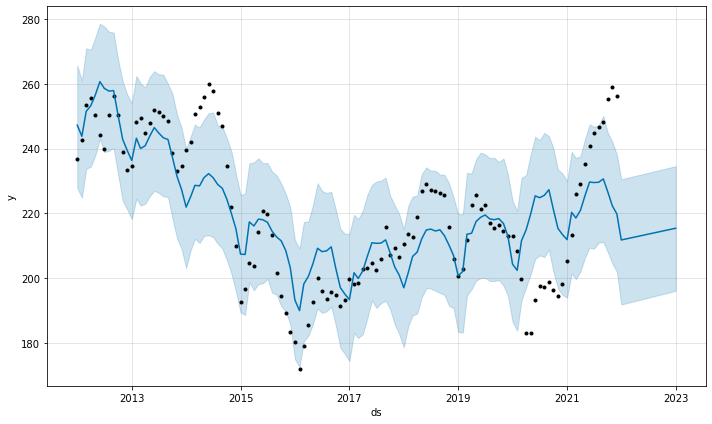

In [54]:
energy_modelplot = m.plot(energy_model)

__Hmmm...I'm not quite sure what's happening at the end there. The model does a good job with fitting the data but it's a bit funky when it comes to the future.__

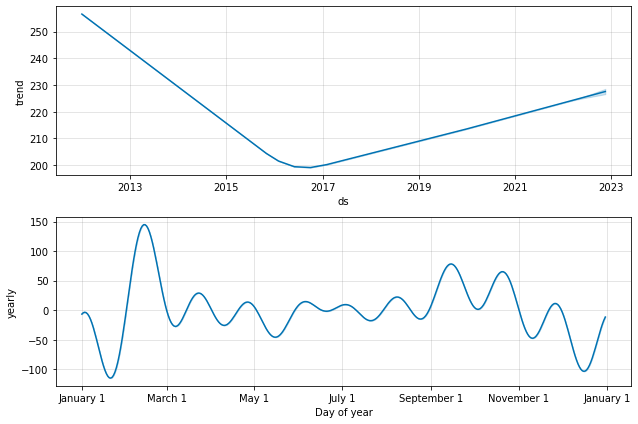

In [13]:
energy_trendplots = m.plot_components(energy_model)

__The second trend plot shows that the CPI for energy is greatest around late-feb/early-march. I now want to try using different seasonalities. I used the default yearly seasonality before, now I will try monthly!__

In [14]:
m = Prophet()
model = m.fit(energy)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [15]:
future = m.make_future_dataframe(periods = 24, freq = "m")
energy_model = m.predict(future)

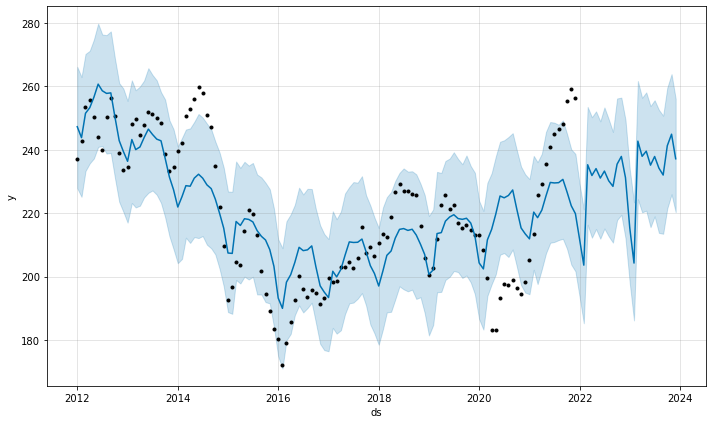

In [16]:
energy_modelplot = m.plot(energy_model)

__This is interesting. While it isn't as perfect as a fit, it does seem to generally follow the trend of the data. The last part also seems much more reasonable.__

__Now I will be testing this model using some more categories: gold, oil, and all items__

In [19]:
new_df = pd.read_csv('cpi_w_gold_oil.csv', index_col = 0).dropna(axis=1)

,Food,Food at home,Cereals and bakery products,Cereals and cereal products,Flour and prepared flour mixes,Breakfast cereal,"Rice, pasta, cornmeal",Bakery products,Bread,"Fresh biscuits, rolls, muffins",...,New and used motor vehicles,Utilities and public transportation,Household furnishings and operations,Other goods and services,Personal care,Recorded music and music subscriptions,"Men's underwear, nightwear, swimwear, and accessories",All items,Crude Oil Price,Gold US dollar per oz
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-01,232.666,231.694,266.677,234.159,252.159,228.664,242.992,283.880,170.658,167.911,...,99.659,205.521,125.629,391.382,210.299,89.691,148.547,227.842,100.27,1656.1
2012-02-01,232.486,231.180,267.821,233.362,250.564,227.984,242.217,286.484,172.978,168.364,...,99.889,205.398,126.180,391.236,210.330,89.896,148.183,228.329,102.20,1742.6
2012-03-01,232.792,231.383,267.101,232.660,252.104,227.997,238.975,285.771,172.955,168.406,...,100.325,205.637,126.107,392.364,211.289,89.704,149.106,228.807,106.16,1673.8
2012-04-01,233.234,231.711,268.014,233.662,252.102,228.862,240.693,286.589,173.559,166.211,...,100.977,206.050,126.114,393.320,211.865,89.084,150.584,229.187,103.32,1650.1
2012-05-01,233.339,231.518,268.653,235.054,254.336,230.326,241.615,286.629,173.581,167.158,...,101.399,206.866,125.905,392.859,211.649,88.904,155.044,228.713,94.66,1585.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-01,279.135,259.825,288.990,236.194,248.823,229.855,245.495,319.545,192.971,186.280,...,119.475,229.805,132.076,479.048,244.968,79.549,167.846,273.092,67.73,1784.0
2021-09-01,281.506,262.695,292.069,236.183,250.198,229.122,245.890,324.458,196.492,194.852,...,117.947,229.568,133.462,479.525,244.840,79.820,168.872,274.214,71.65,1777.3
2021-10-01,284.205,265.478,294.625,239.371,249.956,236.615,245.062,326.628,198.052,195.203,...,120.192,231.301,134.745,483.592,246.307,79.954,170.986,276.590,81.48,1776.9


In [23]:
all_items = new_df.reset_index()
all_items = all_items.loc[:, ["All items", "Date"]] #isolating energy category
all_items["Date"] = pd.to_datetime(all_items["Date"]) #convert dates to datetime objects
all_items.rename(columns={"All items":"y", "Date":"ds"}, inplace = True)  #rename columns to be compatible with the model
all_items

,y,ds
0,227.842,2012-01-01
1,228.329,2012-02-01
2,228.807,2012-03-01
3,229.187,2012-04-01
4,228.713,2012-05-01
...,...,...
115,273.092,2021-08-01
116,274.214,2021-09-01
117,276.590,2021-10-01
118,278.524,2021-11-01


In [24]:
m = Prophet()
model = m.fit(all_items)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [25]:
future = m.make_future_dataframe(periods = 24, freq = "m")
all_items_model = m.predict(future)

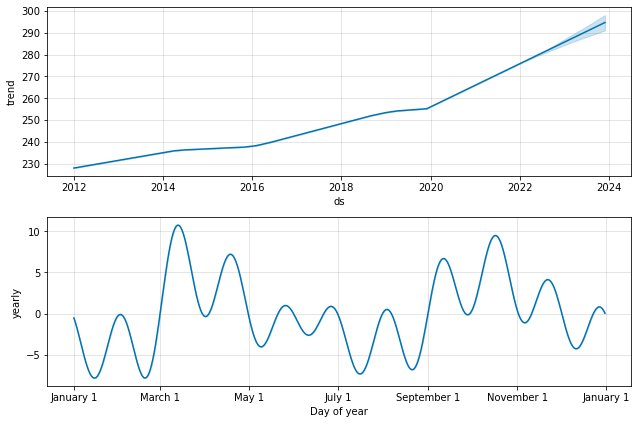

In [27]:
all_items_trendplots = m.plot_components(all_items_model)

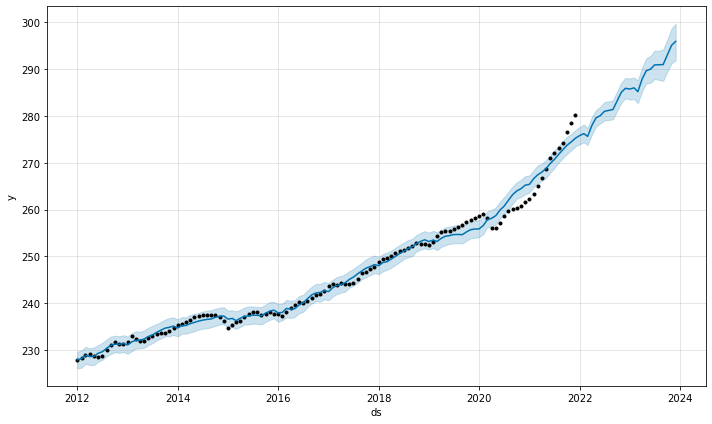

In [26]:
all_items_modelplot = m.plot(all_items_model)

__This model actually looks really good!! It does well following the upward trend. Now I will try gold__

In [29]:
gold = new_df.reset_index()
gold = gold.loc[:, ["Gold US dollar per oz", "Date"]]
gold["Date"] = pd.to_datetime(gold["Date"])
gold.rename(columns={"Gold US dollar per oz":"y", "Date":"ds"}, inplace = True)
gold

,y,ds
0,1656.1,2012-01-01
1,1742.6,2012-02-01
2,1673.8,2012-03-01
3,1650.1,2012-04-01
4,1585.5,2012-05-01
...,...,...
115,1784.0,2021-08-01
116,1777.3,2021-09-01
117,1776.9,2021-10-01
118,1820.2,2021-11-01


In [30]:
m = Prophet()
model = m.fit(gold)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [32]:
future = m.make_future_dataframe(periods = 24, freq = "m")
gold_model = m.predict(future)

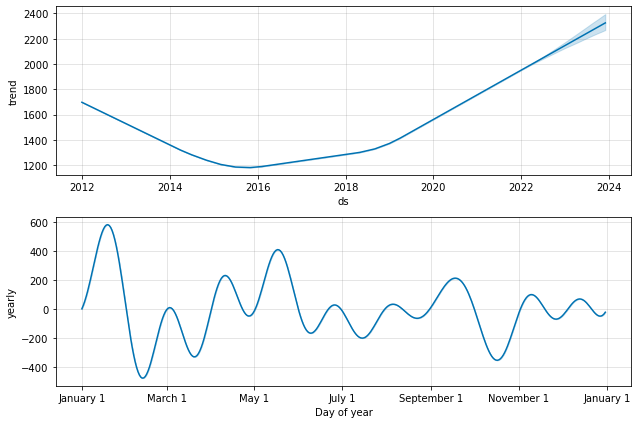

In [33]:
gold_trendplots = m.plot_components(gold_model)

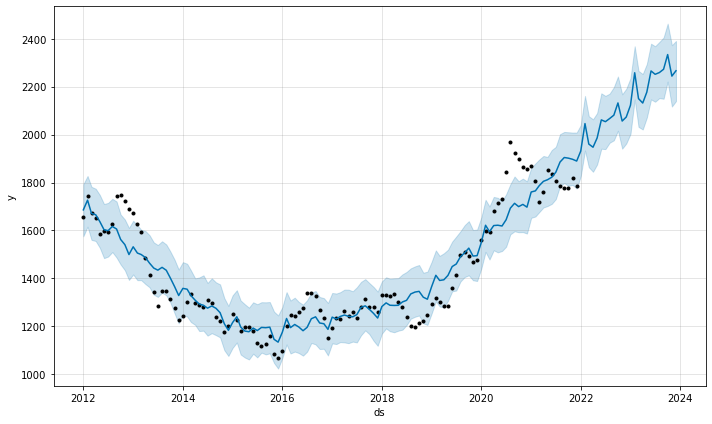

In [34]:
gold_modelplot = m.plot(gold_model)

__This is also pretty good! Now onto oil.__

In [35]:
oil = new_df.reset_index()
oil = oil.loc[:, ["Crude Oil Price", "Date"]]
oil["Date"] = pd.to_datetime(oil["Date"])
oil.rename(columns={"Crude Oil Price":"y", "Date":"ds"}, inplace = True)
oil

,y,ds
0,100.27,2012-01-01
1,102.20,2012-02-01
2,106.16,2012-03-01
3,103.32,2012-04-01
4,94.66,2012-05-01
...,...,...
115,67.73,2021-08-01
116,71.65,2021-09-01
117,81.48,2021-10-01
118,79.15,2021-11-01


In [36]:
m = Prophet()
model = m.fit(oil)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [37]:
future = m.make_future_dataframe(periods = 24, freq = "m")
oil_model = m.predict(future)

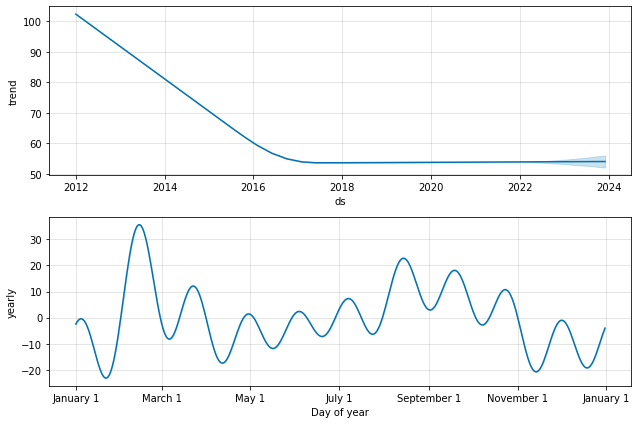

In [38]:
oil_trendplots = m.plot_components(oil_model)

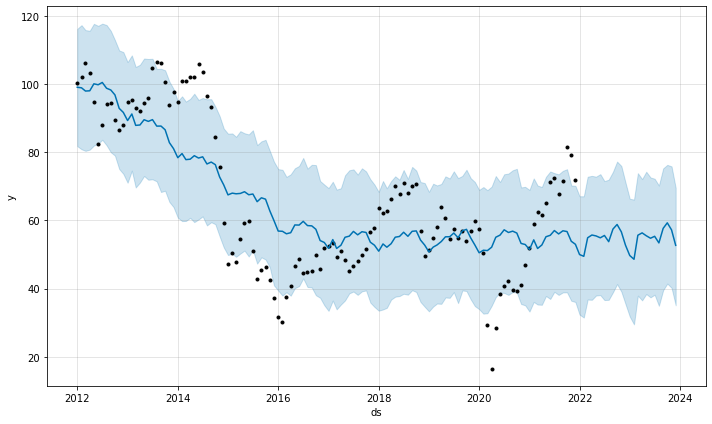

In [40]:
oil_modelplot = m.plot(oil_model)

__This one is definately the worst of the three. The data's patterns are pretty strange. I'll try this catgeory again with a different seasonality.__

In [48]:
future_y = m.make_future_dataframe(periods = 2, freq = 'y')
oil_model_y = m.predict(future_y)

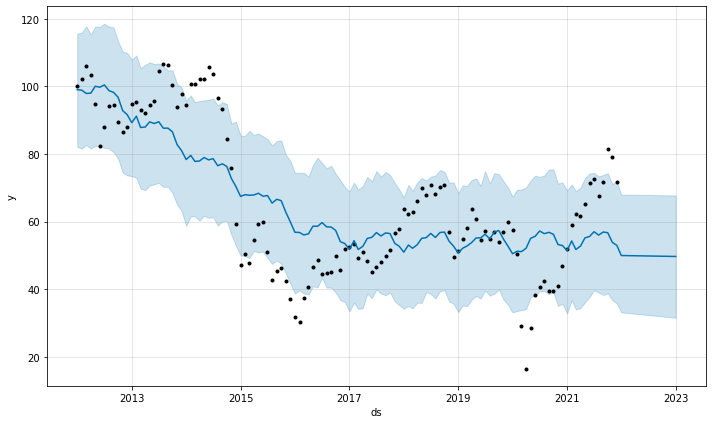

In [49]:
oil_modelplot_y = m.plot(oil_model_y)

__Hmm...not very useful.__